# Predictive Analytics Exam 1 - Evan Callaghan

### Topics: 

### 1. True or False

a) In class imbalanced classification tasks, the goal is to find the model that has the highest accuracy. FALSE

b) Over-fitting is the biggest issue with over-sampling. TRUE

c) Under-fitting is the biggest issue with over-sampling. FALSE

d) A model with a large number of input variables always have a good performance. FALSE

e) If we run the SMOTE sampling technique multiple times on an imbalanced dataset, we will always obtain the same synthetic dataset. FALSE

f) Having access to good data is better than having a good model. TRUE

g) RFE works with any support vector machine model. FALSE

h) RFE doesn’t work with any support vector machine model. FALSE (works with linear kernel)

i) A typical approach to engineer features is to consider interactions because most interactions help models to generate good predictions. TRUE

j) The support vectors in support vector machine models can be used to identify important variables/featues. TRUE

### 2. How does the Recursive Feature Elimination (RFE) algorithm work? Be specific.

The RFE algorithm is essentially a backwards variable selection process. First, a model is built with all predictor variables and the corresponding variable importane scores are computed. Then, the least important predictor variable is dropped, another model is built, and the variable importance scores are computed again. The specific variable subset that produces the optimal model is the one that it used to build the final model.

### 3. Explain one-hot encoding. Be specific.

One-hot encoding is the process of converting catagorical data into a form that can be easily used by a machine learning algorithm to produce better predictions. In this process, all categorical values for a particular variable are created into a categorical column and assigned a value of zero or one. For example: if the data set has a variable "Major" with the values Math, CS, and Business Analytics, one-hot encoding creates three new variables to represent each particular value with a binary label. 

### 4. If you have a date column in your data-frame, then how will you perform feature engineering on the date column? List at least three features that you will engineer from date. Be specific.

Depending on the context of the problem, three possible variables to engineer are: day of the week, day of the month, or month. Day of the week could be important when looking into fraud transactions (they may be more common on weekends). Day of the month could be important when looking at credit card defaults (what day of the month do people typically pay thier bills? Is it close to the limit?). And month could be important when modeling revenue for a store (cyclical trend and some months are not as popular). 

### 5. In what scenarios, would you prefer to use the precision-recall curve instead of ROC curve to measure the performance of a classifier? Be specific.

To measure the performance of a classifier and find the optimal cutoff value, it would be more beneficial to use the precision-recall curve instead of the ROC curve when the data set is imbalanced. With class imbalanced data, we usually care more about decreasing the number of false positive predictions and the precison-recall score does this. On the other hand, ROC curve works best for balanced data sets.

### 6. Explain the biggest drawback of one-vs-one multi-class classification when compared to one-vs-all multi-class classification. Be specific.



### 7. A data scientist is building a linear regression model. One of the input variables is a categorical variable with three labels. So, he decided to use the one-hot encoding approach to transform the categorical variable into dummy variables. How many dummy variables does he need to include in the linear model?

*** D) 3

### 8. Suppose you are building a fraud detection system for major US bank. You have access to all the transaction data for the past week for users (date, location, and amount). What kind of new features can you engineer? Be creative and list at least three features that you would engineer for the fraud detection system.

When looking at the problem of fraud detection, I would engineer the following variables: Distance - the distance between the purchase location and registered home address, Hour of the Day - the hour of the transaction, and Time Since Last Transaction - the time in minutes between two consecutive transactions for a particular customer. 

### 9. Let’s assume that you are the data scientist in charge of this project. The goal is to build a classification system that can flag future credit card payments that are likely to default. Answer the following: a) Is the dataset imbalanced? Be specific. b)  Using the above chart, engineer one feature for your classification model. Be specific.

a) The data set is certainly imbalanced. As an estimation, there are probably seven or eight times as many zero class labels compared to one class labels. 

*** b) 

### 10. Which of the following is/are TRUE about feature subset selection?

*** H

### 11. A data scientist is building a regression model. A few of the input variables are categorical, and he has not looked at the distribution of the categorical data in the test data. The data scientist wants to apply the one-hot encoding on the categorical features. What challenges he may face if he have applied one-hot encoding on a categorical variable of the train dataset?

*** he

### 12. What is the difference between feature engineering and feature selection? Be specific.

Feature engineering is the process of transforming or combining existing data into new features that may help uncover relationships in the data, and ultimately, help the model to make better predictions. On the other hand, feature selection is the process of carefully selecting which input variables (original or engineered) should be included in the final model. This is important because having a manageable number of inputs reduces computing time and including unimportant variables in the model often hurts the prediction power.  

### 13. Based on the discussions from Chapter 4, list at least two benefits of feature selection. Be specific.

Two benefits of feature selection:
1. Having a limited subset of input variables reduces computing time which could be very important when building several different models
2. Often times, including unimportant variables into the model's input variables hurts the overall predictive power. It is usually better to have a manageable set of input variables to optimize performance


### 14. Consider the F1-scores of three different classifiers in a 5-folds cross-validation setting (using the same test dataset) is shown below. Based on the F1-score, what model would use to make predictions? Be specific.

*** mean value across the three models?

### 15. Considering the train.csv and test.csv data files containing information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005. The goal is to predict default payment next month on the test.csv data file

In [1]:
## Importing necessary libraries

import boto3
import pandas as pd; pd.set_option('display.max_columns', 50)
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import precision_recall_cutoff as prc
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE, RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import classification_report

In [2]:
## a) Using the pandas library to read the train.csv and test.csv data files and create two data-frames called train and test

## Defining the bucket
s3 = boto3.resource('s3')
bucket_name = 'data-448-bucket-callaghan'
bucket = s3.Bucket(bucket_name)

file_key = 'train(1).csv'
file_key2 = 'test(1).csv'

bucket_object = bucket.Object(file_key)
bucket_object2 = bucket.Object(file_key2)

file_object = bucket_object.get()
file_object2 = bucket_object2.get()

file_content_stream = file_object.get('Body')
file_content_stream2 = file_object2.get('Body')

train = pd.read_csv(file_content_stream)
test = pd.read_csv(file_content_stream2)

train.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,400000,1,1,2,32,0,0,0,0,0,0,55773,55917,51389,48272,49478,51242,3028,3023,3000,3000,3000,38662,0
1,120000,2,2,2,30,-1,-1,-1,-1,-1,-1,140,3230,3011,1964,1883,1538,3230,3011,1964,1883,1538,1911,0
2,270000,2,2,2,32,0,0,0,0,0,0,59710,49986,104390,94856,86461,83650,1808,69563,2891,2689,3012,2771,0
3,280000,2,2,1,27,0,0,0,0,0,0,280913,283222,273160,257689,193231,191143,11052,9563,15017,5374,5420,6021,0
4,30000,2,1,2,27,0,0,-1,0,0,-2,1512,2458,664,1814,0,0,1000,664,1500,0,0,0,0


In [3]:
## b) Reporting the frequency table of default payment next month variable in the train data-frame

train['default payment next month'].value_counts() / train.shape[0]

0    0.778792
1    0.221208
Name: default payment next month, dtype: float64

In [4]:
## c) Splitting the train data-frame into training (80%) and testing (20%) (taking into account the proportions of 0s and 1s and 
## making sure the distribution of the categorical variables is the approximately the same in the training and testing dataframes

## Printing shape of the data set
print(train.shape)

## Creating an ID column
train['ID'] = list(range(1, train.shape[0] + 1))

## Splitting the data
training = train.groupby('default payment next month', group_keys = False).apply(lambda x: x.sample(frac = 0.8)).reset_index(drop=True)
testing = train[~np.isin(train['ID'], training['ID'])].reset_index(drop=True)

## Dropping the ID columns
train = train.drop(columns = ['ID'])
training = training.drop(columns = ['ID'])
testing = testing.drop(columns = ['ID'])

## Printing shape of new data sets
print(training.shape)
print(testing.shape)

(24000, 24)
(19200, 24)
(4800, 24)


In [5]:
## d) Using the training data-frame to engineer at least five different features that can help to predict default payment next month

## Defining the input and target variables
X = training.drop(columns = ['default payment next month'])
Y = training['default payment next month']

## Splitting the data
X_training, X_testing, Y_training, Y_testing = train_test_split(X, Y, test_size = 0.2, stratify = Y)

[Text(613.8000000000001, 856.1700000000001, 'PAY_0 <= 1.5\ngini = 0.345\nsamples = 15360\nvalue = [11962, 3398]'),
 Text(306.90000000000003, 611.55, 'PAY_2 <= 1.5\ngini = 0.276\nsamples = 13744\nvalue = [11468, 2276]'),
 Text(153.45000000000002, 366.93000000000006, 'PAY_AMT3 <= 395.0\ngini = 0.247\nsamples = 12587\nvalue = [10769, 1818]'),
 Text(76.72500000000001, 122.30999999999995, 'gini = 0.351\nsamples = 3062\nvalue = [2366, 696]'),
 Text(230.175, 122.30999999999995, 'gini = 0.208\nsamples = 9525\nvalue = [8403, 1122]'),
 Text(460.35, 366.93000000000006, 'PAY_6 <= 1.0\ngini = 0.478\nsamples = 1157\nvalue = [699, 458]'),
 Text(383.62500000000006, 122.30999999999995, 'gini = 0.455\nsamples = 841\nvalue = [547, 294]'),
 Text(537.075, 122.30999999999995, 'gini = 0.499\nsamples = 316\nvalue = [152, 164]'),
 Text(920.7, 611.55, 'PAY_6 <= 1.0\ngini = 0.424\nsamples = 1616\nvalue = [494, 1122]'),
 Text(767.2500000000001, 366.93000000000006, 'BILL_AMT1 <= 649.5\ngini = 0.457\nsamples = 974\

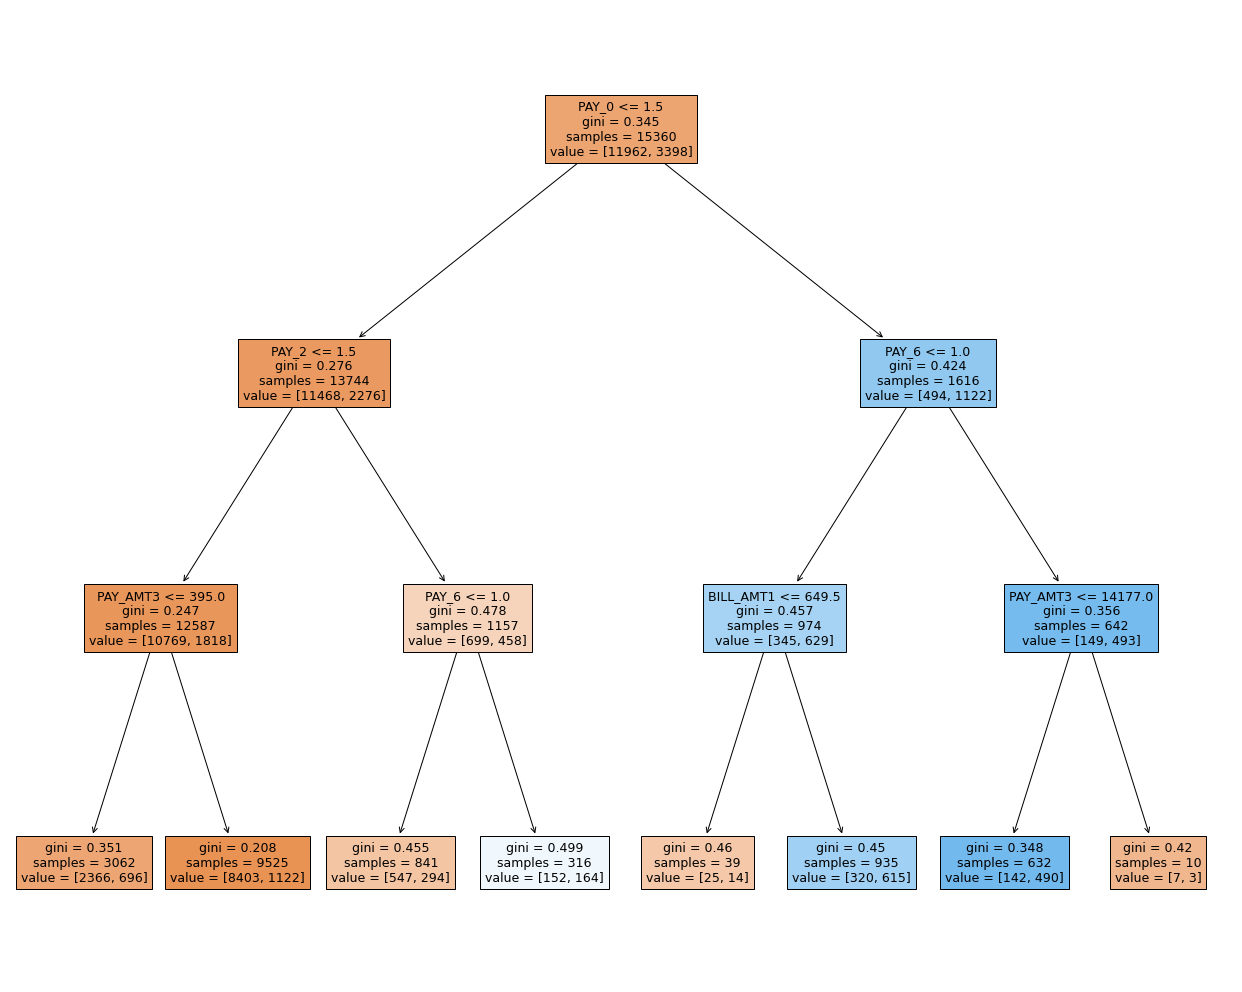

In [10]:
## First, building a plot tree to visualize relationships

## Building a decision tree model with max depth = 3 on the train data-frame
tree_md = DecisionTreeClassifier(max_depth = 3).fit(X_training, Y_training)

## Visualizing the decision tree model and identify any interesting interactions/features
fig = plt.figure(figsize = (22, 18))
plot_tree(tree_md, feature_names = X.columns, filled = True)

In [11]:
## Now, computing variable importance scores

## Defining a list to store results
results = []

for i in range(0, 10):
    
    ## Splitting the data
    X_training, X_testing, Y_training, Y_testing = train_test_split(X, Y, test_size = 0.2, stratify = Y)
    
    ## Building the model
    rf_md = RandomForestClassifier(max_depth = 5, n_estimators = 500).fit(X_training, Y_training)
    
    ## Extracting feature importance scores
    results.append(rf_md.feature_importances_)
    
## Changing results list to a dataframe
results = pd.DataFrame(results, columns = X.columns)

## Computing averages and sorting variables by importance
results = pd.DataFrame(results.apply(np.mean, axis = 0))
results = pd.DataFrame({'Feature': results.index, 'Importance': results[0].values}).sort_values(by = 'Importance', ascending = False)

results

,Feature,Importance
5,PAY_0,0.338239
6,PAY_2,0.170354
7,PAY_3,0.098242
8,PAY_4,0.074421
9,PAY_5,0.067519
10,PAY_6,0.047766
17,PAY_AMT1,0.033068
0,LIMIT_BAL,0.023001
18,PAY_AMT2,0.020755
19,PAY_AMT3,0.019268


In [12]:
## Feature 1: Mean payment amount
training['Mean_Payment'] = np.mean(training[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']], axis = 1)


## Feature 2: Mean bill amount
training['Mean_Bill'] = np.mean(training[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']], axis = 1)


## Feature 3: Mean Payment < Mean Bill/2
training['MP_<_MB/2'] = np.where(training['Mean_Payment'] < training['Mean_Bill']/2, 1, 0)


## Feature 4: Most common repayment status
training['Most_Common'] = np.nan
for i in range(0, training.shape[0]):
    training.at[i, 'Most_Common'] = training[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].loc[i].mode()[0]
    

## Feature 5: Getting close to limit? Comparing limit to current balance
training['Limit_Status'] =  (np.sum(training[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']], 
                                    axis = 1) - np.sum(training[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']], 
                                                       axis = 1)) / training['LIMIT_BAL']


## Feature 6: Bill AMT in September greater than average?
training['Sept_Amount'] = np.where(training['BILL_AMT1'] > np.mean(training[['BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']], axis = 1),
                                  1, 0)


## From plot tree:
training['Tree1'] = np.where((training['PAY_0'] <= 1.5) & (training['PAY_2'] <= 1.5) & (training['PAY_AMT3'] <= 395.0), 1, 0)
training['Tree2'] = np.where((training['PAY_0'] <= 1.5) & (training['PAY_2'] <= 1.5) & (training['PAY_AMT3'] > 395.0), 1, 0)

training['Tree3'] = np.where((training['PAY_0'] <= 1.5) & (training['PAY_2'] > 1.5) & (training['PAY_6'] <= 1.0), 1, 0)
training['Tree4'] = np.where((training['PAY_0'] <= 1.5) & (training['PAY_2'] > 1.5) & (training['PAY_6'] > 1.0), 1, 0)

training['Tree5'] = np.where((training['PAY_0'] > 1.5) & (training['PAY_6'] <= 1.0) & (training['BILL_AMT1'] <= 649.5), 1, 0)
training['Tree6'] = np.where((training['PAY_0'] > 1.5) & (training['PAY_6'] <= 1.0) & (training['BILL_AMT1'] > 649.5), 1, 0)

training['Tree7'] = np.where((training['PAY_0'] > 1.5) & (training['PAY_6'] > 1.0) & (training['PAY_AMT3'] <= 14177.0), 1, 0)
training['Tree8'] = np.where((training['PAY_0'] > 1.5) & (training['PAY_6'] > 1.0) & (training['PAY_AMT3'] > 14177.0), 1, 0)


## From strong heredity
training['Heredity1'] = training['PAY_0'] * training['PAY_2']

In [13]:
## Engineering the same features on the testing and test data-frames


## Testing:
testing['Mean_Payment'] = np.mean(testing[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']], axis = 1)

testing['Mean_Bill'] = np.mean(testing[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']], axis = 1)

testing['MP_<_MB/2'] = np.where(testing['Mean_Payment'] < testing['Mean_Bill']/2, 1, 0)

testing['Most_Common'] = np.nan
for i in range(0, testing.shape[0]):
    testing.at[i, 'Most_Common'] = testing[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].loc[i].mode()[0]
    
testing['Limit_Status'] =  (np.sum(testing[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']], 
                                    axis = 1) - np.sum(testing[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']], 
                                                       axis = 1)) / testing['LIMIT_BAL']

testing['Sept_Amount'] = np.where(testing['BILL_AMT1'] > np.mean(testing[['BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']], axis = 1),
                                  1, 0)

testing['Tree1'] = np.where((testing['PAY_0'] <= 1.5) & (testing['PAY_2'] <= 1.5) & (testing['PAY_AMT3'] <= 395.0), 1, 0)
testing['Tree2'] = np.where((testing['PAY_0'] <= 1.5) & (testing['PAY_2'] <= 1.5) & (testing['PAY_AMT3'] > 395.0), 1, 0)

testing['Tree3'] = np.where((testing['PAY_0'] <= 1.5) & (testing['PAY_2'] > 1.5) & (testing['PAY_6'] <= 1.0), 1, 0)
testing['Tree4'] = np.where((testing['PAY_0'] <= 1.5) & (testing['PAY_2'] > 1.5) & (testing['PAY_6'] > 1.0), 1, 0)

testing['Tree5'] = np.where((testing['PAY_0'] > 1.5) & (testing['PAY_6'] <= 1.0) & (testing['BILL_AMT1'] <= 649.5), 1, 0)
testing['Tree6'] = np.where((testing['PAY_0'] > 1.5) & (testing['PAY_6'] <= 1.0) & (testing['BILL_AMT1'] > 649.5), 1, 0)

testing['Tree7'] = np.where((testing['PAY_0'] > 1.5) & (testing['PAY_6'] > 1.0) & (testing['PAY_AMT3'] <= 14177.0), 1, 0)
testing['Tree8'] = np.where((testing['PAY_0'] > 1.5) & (testing['PAY_6'] > 1.0) & (testing['PAY_AMT3'] > 14177.0), 1, 0)

testing['Heredity1'] = testing['PAY_0'] * testing['PAY_2']



## Test:
test['Mean_Payment'] = np.mean(test[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']], axis = 1)

test['Mean_Bill'] = np.mean(test[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']], axis = 1)

test['MP_<_MB/2'] = np.where(test['Mean_Payment'] < test['Mean_Bill']/2, 1, 0)

test['Most_Common'] = np.nan
for i in range(0, test.shape[0]):
    test.at[i, 'Most_Common'] = test[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].loc[i].mode()[0]
    
test['Limit_Status'] =  (np.sum(test[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']], 
                                    axis = 1) - np.sum(test[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']], 
                                                       axis = 1)) / test['LIMIT_BAL']

test['Sept_Amount'] = np.where(test['BILL_AMT1'] > np.mean(test[['BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']], axis = 1),
                                  1, 0)

test['Tree1'] = np.where((test['PAY_0'] <= 1.5) & (test['PAY_2'] <= 1.5) & (test['PAY_AMT3'] <= 395.0), 1, 0)
test['Tree2'] = np.where((test['PAY_0'] <= 1.5) & (test['PAY_2'] <= 1.5) & (test['PAY_AMT3'] > 395.0), 1, 0)

test['Tree3'] = np.where((test['PAY_0'] <= 1.5) & (test['PAY_2'] > 1.5) & (test['PAY_6'] <= 1.0), 1, 0)
test['Tree4'] = np.where((test['PAY_0'] <= 1.5) & (test['PAY_2'] > 1.5) & (test['PAY_6'] > 1.0), 1, 0)

test['Tree5'] = np.where((test['PAY_0'] > 1.5) & (test['PAY_6'] <= 1.0) & (test['BILL_AMT1'] <= 649.5), 1, 0)
test['Tree6'] = np.where((test['PAY_0'] > 1.5) & (test['PAY_6'] <= 1.0) & (test['BILL_AMT1'] > 649.5), 1, 0)

test['Tree7'] = np.where((test['PAY_0'] > 1.5) & (test['PAY_6'] > 1.0) & (test['PAY_AMT3'] <= 14177.0), 1, 0)
test['Tree8'] = np.where((test['PAY_0'] > 1.5) & (test['PAY_6'] > 1.0) & (test['PAY_AMT3'] > 14177.0), 1, 0)

test['Heredity1'] = test['PAY_0'] * test['PAY_2']

In [19]:
## e) Using the training data-frame (including the engineered features from part (d)) to run the RFE algorithm to identify important 
## variables. Running the RFE (using the RFECV function) with step = 1, min features to select = 2, and cv = 3

## Defining input and target variables
X_training = training.drop(columns = ['default payment next month'])
Y_training = training['default payment next month']

## Defining empty list to store results
rfe_results = []

## Repeating 100 times
for i in tqdm(range(0, 100)):
    
    ## Splitting the data
    X_train, X_test, Y_train, Y_test = train_test_split(X_training, Y_training, test_size = 0.2, stratify = Y)
    
    ## Running RFEC
    rf_rfecv = RFECV(estimator = RandomForestClassifier(max_depth = 3, n_estimators = 500), step = 1, 
                 min_features_to_select = 2, cv = 3).fit(X_training, Y_training)
    
    ## Appending features to be selected
    rfe_results.append(rf_rfecv.support_)

Index(['PAY_0', 'PAY_2', 'PAY_3', 'Mean_Payment', 'Most_Common', 'Tree2',
       'Tree6', 'Tree7'],
      dtype='object')


In [ ]:
## Changing result list a to data-frame

rfe_results = pd.DataFrame(rfe_results, columns = X_training.columns)
results = 100 * rfe_results.apply(np.sum, axis = 0) / rfe_results.shape[0]

In [ ]:
## Graphing results

fig = plt.subplots(2, 2, figsize = (24, 24))


axes[1, 1].barh(results.index, results.values)
axes[1, 1].set_xlabel('Feature Selection Percentage')
axes[1, 1].set_title('Overall Results')

In [14]:
## f) Using the top 5 variables from the part (e) and the same base estimator from part (e) to build a model on the training data-frame


## Defining the input and target variables
X_training = training[['PAY_0', 'PAY_2', 'PAY_3', 'Mean_Payment', 'Most_Common', 'Tree2', 'Tree6', 'Tree7']]
Y_training = training['default payment next month']

X_testing = testing[['PAY_0', 'PAY_2', 'PAY_3', 'Mean_Payment', 'Most_Common', 'Tree2', 'Tree6', 'Tree7']]
Y_testing = testing['default payment next month']


## Building the model
rf_md = RandomForestClassifier(max_depth = 3, n_estimators = 500).fit(X_training, Y_training)

## Predicting on the testing set
rf_preds = rf_md.predict_proba(X_testing)[:, 1]

## Extracting predicted labels using the precision-recall-curve
rf_labels, optimal_cutoff = prc.precision_recall_cutoff(Y_testing, rf_preds)

## Computing the classification report
print('Model with top-5 predictor variables:/n')
print(classification_report(Y_testing, rf_labels))

## Printing the optimal cutoff value for label predictions
print('\nOptimal cutoff value:', optimal_cutoff)

Model with top-5 predictor variables
              precision    recall  f1-score   support

           0       0.87      0.88      0.87      3738
           1       0.56      0.55      0.55      1062

    accuracy                           0.80      4800
   macro avg       0.72      0.71      0.71      4800
weighted avg       0.80      0.80      0.80      4800

Optimal cutoff value: 0.23432079331394173


In [19]:
## g) Using the top 6 variables from the part (e) and the same base estimator from part (e) to build a model on the training data-frame


## Defining the input and target variables
X_training = training[['PAY_0', 'PAY_2', 'PAY_3', 'Mean_Payment', 'Most_Common', 'Tree2', 'Tree6', 'Tree7']]
Y_training = training['default payment next month']

X_testing = testing[['PAY_0', 'PAY_2', 'PAY_3', 'Mean_Payment', 'Most_Common', 'Tree2', 'Tree6', 'Tree7']]
Y_testing = testing['default payment next month']


## Building the model
rf_md = RandomForestClassifier(max_depth = 3, n_estimators = 500).fit(X_training, Y_training)

## Predicting on the testing set
rf_preds = rf_md.predict_proba(X_testing)[:, 1]

## Extracting predicted labels using the precision-recall-curve
rf_labels, optimal_cutoff = prc.precision_recall_cutoff(Y_testing, rf_preds)

## Computing the classification report
print('Model with top-6 predictor variables:\n')
print(classification_report(Y_testing, rf_labels))

## Printing the optimal cutoff value for label predictions
print('\nOptimal cutoff value:', optimal_cutoff)

Model with top-6 predictor variables:

              precision    recall  f1-score   support

           0       0.87      0.87      0.87      3738
           1       0.55      0.55      0.55      1062

    accuracy                           0.80      4800
   macro avg       0.71      0.71      0.71      4800
weighted avg       0.80      0.80      0.80      4800


Optimal cutoff value: 0.2346408916641556


#### h)  Using the results from parts (f) and (g), we would use the Random Forest Classifier model with the top-______ variables to predict default payment next month because of the improved predictive power over the other model.

In [22]:
## Predicting the likelihood of default payment next month on the test data-frame


## Defining the input and target variables
X_training = training[['PAY_0', 'PAY_2', 'PAY_3', 'Mean_Payment']]
Y_training = training['default payment next month']

X_test = test[['PAY_0', 'PAY_2', 'PAY_3', 'Mean_Payment']]


## Building the model
rf_md = RandomForestClassifier(max_depth = 3, n_estimators = 500).fit(X_training, Y_training)

## Predicting on the testing set
rf_preds = rf_md.predict_proba(X_test)[:, 1]

## Creating a data-frame to store results
predictions = pd.DataFrame({'Likelihoods': rf_preds})

## Exporting predicted likelihoods as a csv file
predictions.to_csv('likelihoods.csv', index = False)

## Associated cutoff value = _________